# Predicting heart disease using machine learning

### Flow of Machine learning project is :

1. importing Necessary libraries
2.Data exploration
3.Data Description
4.EDA & Analysis of features
5. Correlation 
6.Data Pre-processing -to dummify nominal features
7.Train-Test Split
8.Hyperparameter tuning of some of models
9.Model comparison

In [79]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Data Exploration

In [80]:
# Reading the dataset
df = pd.read_csv('Dataset.csv')



In [81]:
df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [82]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.438944,0.679868,2.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,0.600660,0.663366,1.831683,0.458746
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,0.934375,0.956705,0.499120
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,48.000000,0.000000,2.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,56.000000,1.000000,2.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,1.000000,0.000000
75%,61.000000,1.000000,3.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,1.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,3.000000,3.000000,1.000000


In [83]:
# Check the first 5 rows of the dataset
print(df.head())

   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   0       145   233    1        2      150      0      2.3      2   
1   67    1   3       160   286    0        2      108      1      1.5      1   
2   67    1   3       120   229    0        2      129      1      2.6      1   
3   37    1   2       130   250    0        0      187      0      3.5      2   
4   41    0   1       130   204    0        2      172      0      1.4      0   

   ca  thal  target  
0   0     2       0  
1   3     1       1  
2   2     3       1  
3   0     1       0  
4   0     1       0  


In [84]:
# Check the shape of the dataset
print(df.shape)


(303, 14)


In [85]:
# Check the column names
df.columns


Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [86]:
# Check the data types of the columns
print(df.dtypes)

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object


In [87]:
df.isnull().sum().sum()

0

There are no null values in dataset.So,we dont need to do null value imputation.

# Data Description

This database contains 13 attributes and a target variable. It has 8 nominal values and 5 numeric values. The detailed description of all these features are as follows:

1.	Age: Patients Age in years (Numeric)
2.	Sex: Gender (Male : 1; Female : 0) (Nominal)
3.	cp: Type of chest pain experienced by patient. This term categorized into 4 category.
    0 typical angina, 1 atypical angina, 2 non- anginal pain, 3 asymptomatic (Nominal)
4.	trestbps: patient's level of blood pressure at resting mode in mm/HG (Numerical)
5.	chol: Serum cholesterol in mg/dl (Numeric)
6.	fbs: Blood sugar levels on fasting > 120 mg/dl represents as 1 in case of true and 0 as false (Nominal)
7.	restecg: Result of electrocardiogram while at rest are represented in 3 distinct values
     0 : Normal 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of >
     0.05 mV) 2: showing probable or definite left ventricular hypertrophyby Estes' criteria (Nominal)
8.	thalach: Maximum heart rate achieved (Numeric)
9.	exang: Angina induced by exercise 0 depicting NO 1 depicting Yes (Nominal)
10.	oldpeak: Exercise induced ST-depression in relative with the state of rest (Numeric)
11.	slope: ST segment measured in terms of slope during peak exercise
     0: up sloping; 1: flat; 2: down sloping(Nominal)
12.	ca: The number of major vessels (0–3)(nominal)
13.	thal: A blood disorder called thalassemia
    0: NULL 1: normal blood flow 2: fixed defect (no blood flow in some part of the heart) 3: reversible defect (a blood flow is      observed but it is not normal(nominal)
14.	target: It is the target variable which we have to predict 1 means patient is suffering from heart disease and 0 means patient is normal.


In [88]:
# target is the output and the final conclusion if a person has heart disease or not 
df.target.value_counts()

0    164
1    139
Name: target, dtype: int64

# EDA

array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'sex'}>,
        <AxesSubplot:title={'center':'cp'}>,
        <AxesSubplot:title={'center':'trestbps'}>],
       [<AxesSubplot:title={'center':'chol'}>,
        <AxesSubplot:title={'center':'fbs'}>,
        <AxesSubplot:title={'center':'restecg'}>,
        <AxesSubplot:title={'center':'thalach'}>],
       [<AxesSubplot:title={'center':'exang'}>,
        <AxesSubplot:title={'center':'oldpeak'}>,
        <AxesSubplot:title={'center':'slope'}>,
        <AxesSubplot:title={'center':'ca'}>],
       [<AxesSubplot:title={'center':'thal'}>,
        <AxesSubplot:title={'center':'target'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

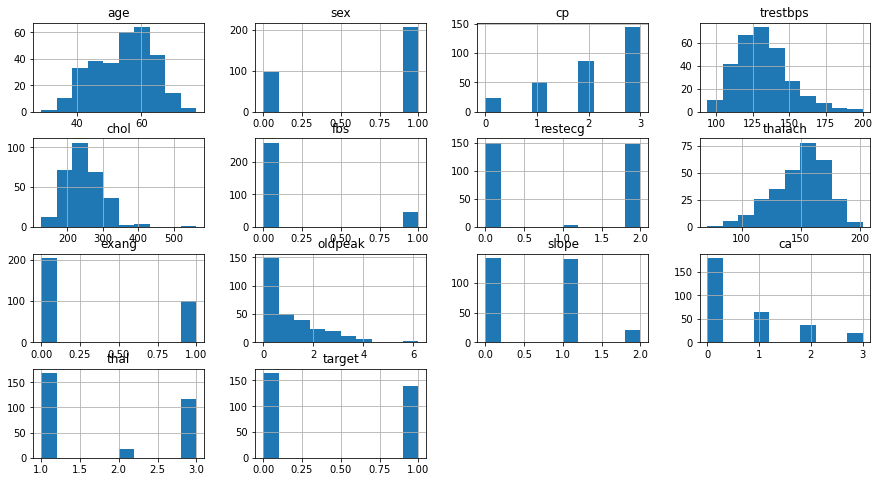

In [89]:
df.hist(figsize=(15, 8))


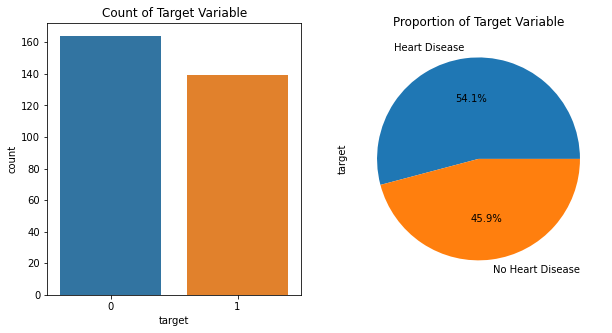

Percentage of patients without heart problems: 45.87458745874587
Percentage of patients with heart problems: 54.12541254125413


In [90]:

# Count the target variable and plot it
y = df.target


fig, ax = plt.subplots(1, 2, figsize=(10,5))
sns.countplot(x='target', data=df, ax=ax[0])
ax[0].set_title('Count of Target Variable')

df['target'].value_counts().plot(kind='pie', autopct='%1.1f%%', ax=ax[1], labels=['Heart Disease', 'No Heart Disease'])
ax[1].set_title('Proportion of Target Variable')
plt.show()

print("Percentage of patients without heart problems: "+str(y.where(y==1).count()*100/303))
print("Percentage of patients with heart problems: "+str(y.where(y==0).count()*100/303))

## Analysing the 'Sex' feature


In [91]:
df.sex.value_counts()


1    206
0     97
Name: sex, dtype: int64

In [92]:
# Comparing target column with sex column
pd.crosstab(df.target, df.sex)

sex,0,1
target,,
0,72,92
1,25,114


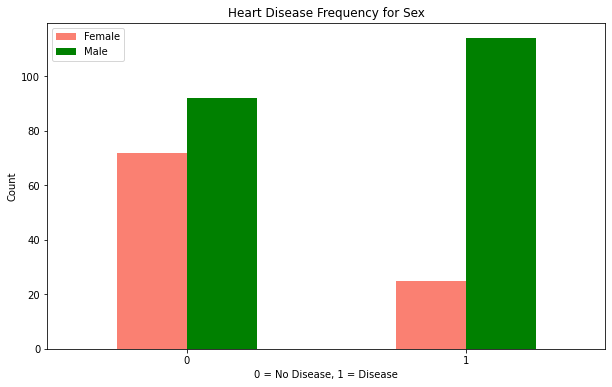

In [93]:
ct = pd.crosstab(df.target, df.sex)

# Plot the crosstab as a bar chart
ct.plot(kind="bar", figsize=(10, 6), color=["salmon", "green"])

# Add labels and title
plt.title("Heart Disease Frequency for Sex")
plt.xlabel("0 = No Disease, 1 = Disease")
plt.ylabel("Count")
plt.legend(["Female", "Male"])
plt.xticks(rotation=0)

# Show the plot
plt.show()

Males are much more likely for heart diseases.


In [94]:
df["sex"].unique()


array([1, 0], dtype=int64)

C:\Users\tripa\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='sex', ylabel='target'>

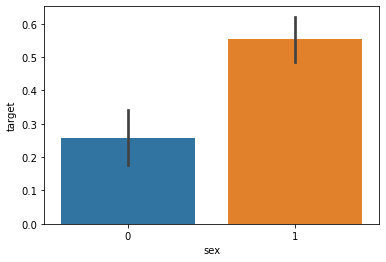

In [95]:
sns.barplot(df["sex"],y)


**We see that females are more likely to have heart problems than males**

## Analysing the 'Chest Pain Type' feature

**Type of chest pain experienced by patient. This term is categorized into 4 category.**

0 typical angina

1 atypical angina

2 non- anginal pain

3 asymptomatic 


In [96]:
df["cp"].unique()


array([0, 3, 2, 1], dtype=int64)

C:\Users\tripa\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


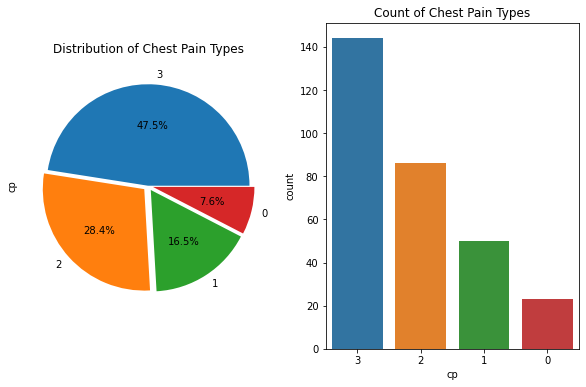

In [97]:
f,ax=plt.subplots(1,2,figsize=(10,6))
df["cp"].value_counts().plot.pie(ax = ax[0],autopct='%1.1f%%',explode = [0,0.05,0.05,0.05])
ax[0].set_title("Distribution of Chest Pain Types")

sns.countplot('cp',data=df,ax=ax[1],order=df['cp'].value_counts().index)
ax[1].set_title("Count of Chest Pain Types")
plt.show()

 So ,most of patients have chest pain type as asymptomatic

C:\Users\tripa\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='cp', ylabel='target'>

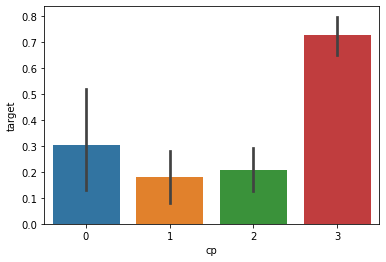

In [98]:
sns.barplot(df["cp"],y)


In [99]:
pd.crosstab(df.cp, df.target)

target,0,1
cp,,
0,16,7
1,41,9
2,68,18
3,39,105


<Figure size 720x432 with 0 Axes>

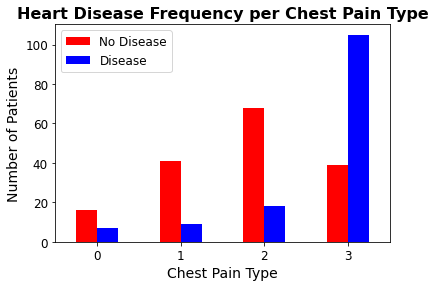

In [100]:
# Create a bar chart to show Heart Disease Frequency per Chest Pain Type
plt.figure(figsize=(10, 6))
pd.crosstab(df.cp, df.target).plot(kind="bar", color=["Red", "Blue"])

# Add chart title, labels and legend
plt.title("Heart Disease Frequency per Chest Pain Type", fontsize=16, fontweight='bold')
plt.xlabel("Chest Pain Type", fontsize=14)
plt.ylabel("Number of Patients", fontsize=14)
plt.legend(["No Disease", "Disease"], fontsize=12)
plt.xticks(rotation=0, fontsize=12)
plt.yticks(fontsize=12)

plt.show()


Chest pain type  has no direct relation on the outcome.Asymptomatic chest pains having highest disease outcome.

## Analysing the FBS(Fasting Blood Sugar) feature

In [101]:
df["fbs"].describe()


count    303.000000
mean       0.148515
std        0.356198
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        1.000000
Name: fbs, dtype: float64

In [102]:
df["fbs"].unique()


array([1, 0], dtype=int64)

C:\Users\tripa\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='fbs', ylabel='target'>

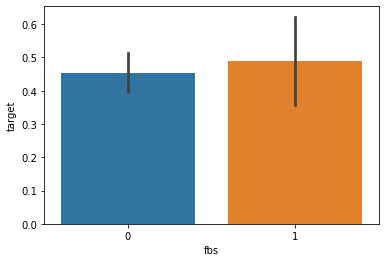

In [103]:
sns.barplot(df["fbs"],y)


**Blood sugar has no direct effect on the disease.**



## Analysing the restecg(resting electrocardiographic) feature


Result of electrocardiogram while at rest are represented in 3 distinct values

0 : Normal 

1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of >
0.05 mV) 

2: showing probable or definite left ventricular hypertrophyby Estes' criteria (Nominal)


In [104]:
df["restecg"].unique()


array([2, 0, 1], dtype=int64)

C:\Users\tripa\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='restecg', ylabel='target'>

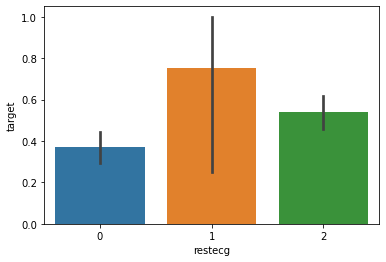

In [105]:
sns.barplot(df["restecg"],y)


<AxesSubplot:xlabel='restecg', ylabel='count'>

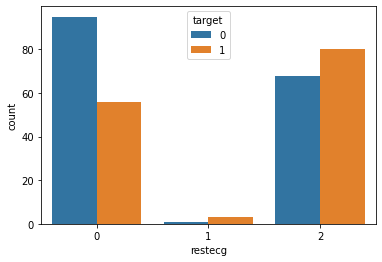

In [106]:
sns.countplot( x=df['restecg'], hue=df['target'])


Rest ECG results showing no direct results but having normal ECG is a good sign. Even though it's quite rare in the data.

If someone has ST-T wave abnormality,he is more likely to have heart disease.

## Analysing the 'exang' feature

Angina induced by exercise 

0 depicting NO 

1 depicting Yes 

In [107]:
df["exang"].unique()


array([0, 1], dtype=int64)

C:\Users\tripa\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='exang', ylabel='target'>

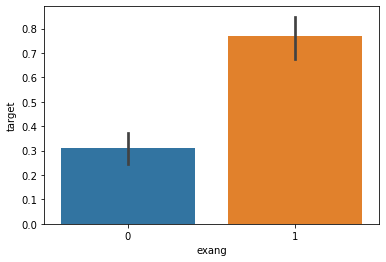

In [108]:
sns.barplot(df["exang"],y)


## Analysing the Slope feature

**slope**: ST segment measured in terms of slope during peak exercise

0: up sloping; 

1: flat; 

2: down sloping(Nominal)


In [109]:
df["slope"].unique()


array([2, 1, 0], dtype=int64)

C:\Users\tripa\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='slope', ylabel='target'>

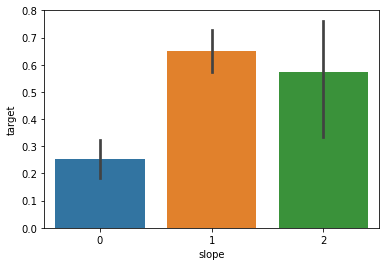

In [110]:
sns.barplot(df["slope"],y)


**Patients who had flat slope distribution are more likely to have disease.**

## Analysing the 'ca' feature

In [111]:
df["ca"].unique()


array([0, 3, 2, 1], dtype=int64)

C:\Users\tripa\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='ca', ylabel='count'>

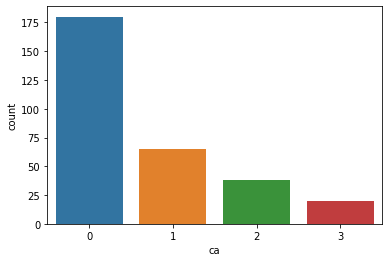

In [112]:
sns.countplot(df["ca"])


C:\Users\tripa\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='ca', ylabel='target'>

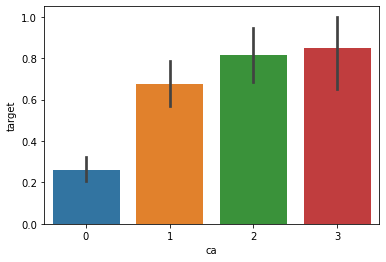

In [113]:
sns.barplot(df["ca"],y)


## Analysing the 'thal' feature


thal: A blood disorder called thalassemia

0: NULL 

1: normal blood flow 

2: fixed defect (no blood flow in some part of the heart) 

3: reversible defect (a blood flow is observed but it is not normal(nominal)


In [114]:
df["thal"].unique()


array([2, 1, 3], dtype=int64)

C:\Users\tripa\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='thal', ylabel='target'>

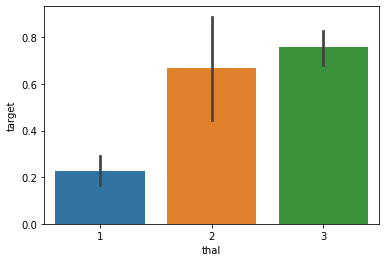

In [115]:
sns.barplot(df["thal"],y)


**Having defected thalium test results is pretty strong indicator for heart disease**

C:\Users\tripa\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='thal', ylabel='Density'>

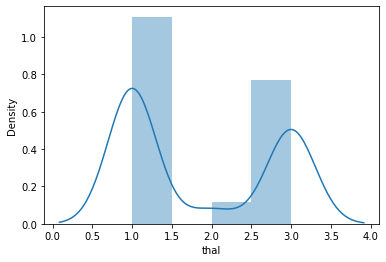

In [116]:
sns.distplot(df["thal"])


## Analyzing Age

C:\Users\tripa\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'ploting age')

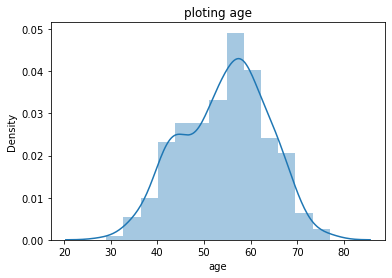

In [117]:
sns.distplot(df["age"])
plt.title("ploting age")


In [118]:
#to find minimum and maximum ages
minAge =min(df["age"])
maxAge =max(df["age"])
avgAge = (df["age"]).mean()
print("Minimum age:",minAge)
print("Maximum age:",maxAge)
print("Average age:",avgAge)

Minimum age: 29
Maximum age: 77
Average age: 54.43894389438944


In [119]:
age_stats = df['age'].describe()
minAge = age_stats.loc['min']
maxAge = age_stats.loc['max']
avgAge = age_stats.loc['mean']

print("Minimum age:",minAge)
print("Maximum age:",maxAge)
print("Average age:",avgAge)


Minimum age: 29.0
Maximum age: 77.0
Average age: 54.43894389438944


In [120]:
#we can also understand data into age catagries 
young = df.query('age >= 28 and age < 43')
intermediate = df.query('age >= 43 and age < 55')
elderly = df.query('age > 55')

print("Young age person:",len(young))
print("Intermediate age person:",len(intermediate)) 
print("Elderly age person",len(elderly)) 

Young age person: 36
Intermediate age person: 107
Elderly age person 152


<AxesSubplot:>

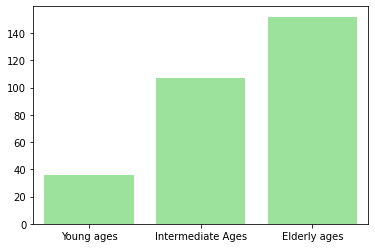

In [121]:
sns.barplot(x = ["Young ages","Intermediate Ages","Elderly ages"], y =[len(young),len(intermediate),len(elderly)], color = "Lightgreen")


### Age vs. Max Heart Rate for Heart Disease

<AxesSubplot:xlabel='target', ylabel='thalach'>

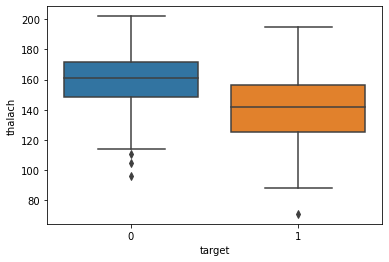

In [122]:
sns.boxplot(y=df['thalach'], x=df['target'])


This shows people having heart disease have a high max heart rate



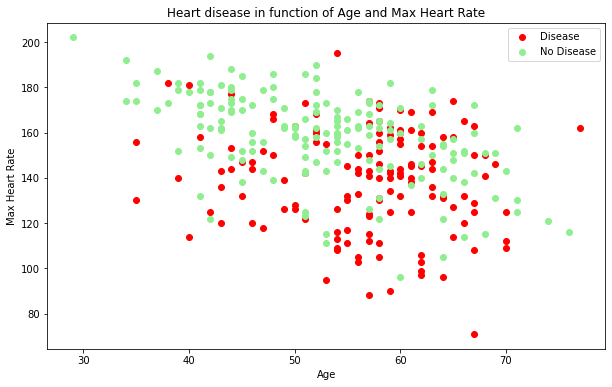

In [123]:
plt.figure(figsize=(10, 6))

#Scatter with positive examples
plt.scatter(df.age[df.target == 1], df.thalach[df.target == 1], c="Red", label="Disease")

#Scatter with negative examples
plt.scatter(df.age[df.target == 0], df.thalach[df.target == 0], c="lightGreen", label="No Disease")


plt.title("Heart disease in function of Age and Max Heart Rate")
plt.xlabel("Age")
plt.ylabel("Max Heart Rate")
plt.legend()

It appears that younger individuals tend to have higher maximum heart rates, as evidenced by the concentration of dots towards the left side of the graph. Additionally, there seems to be a greater prevalence of heart disease in older individuals, as suggested by the larger number of blue dots towards the right side of the graph. 

However, it's important to note that this could be due to the fact that there are simply more data points in that age range. Overall, these observations are merely preliminary, but they do provide some insight into the relationship between age, maximum heart rate, and heart disease.

### Analyzing Oldpeak 

<AxesSubplot:xlabel='target', ylabel='oldpeak'>

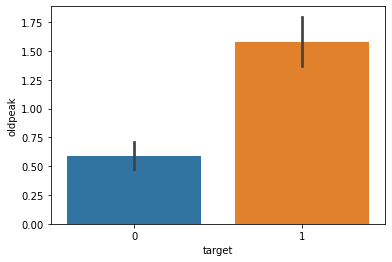

In [124]:
sns.barplot(x=df["target"], y=df["oldpeak"])


# Correlation Matrix

Text(0.5, 1.0, 'Correlation Matrix Heatmap')

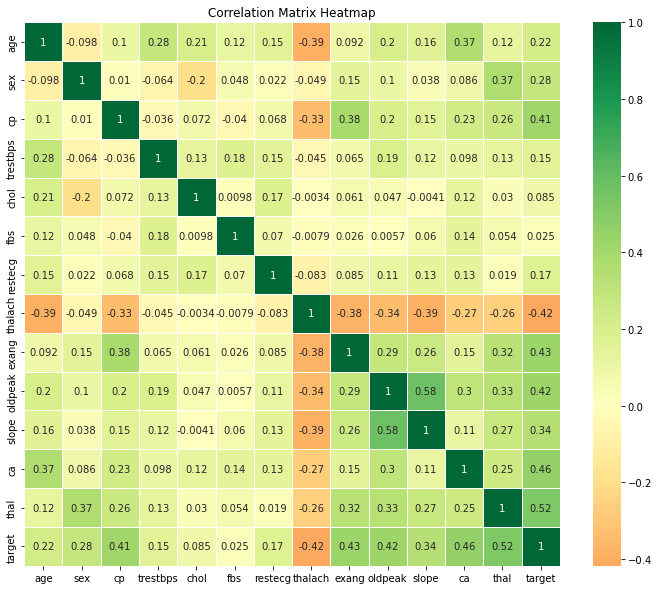

In [125]:
import seaborn as sns

# Get correlations of each features in dataset
corrmat = df.corr()
top_corr_features = corrmat.index

# Set figure size
plt.figure(figsize=(12, 10))

# Plot heatmap
g = sns.heatmap(df[top_corr_features].corr(),
                annot=True,
                cmap="RdYlGn",
                linewidths=.5,
                center=0)

# Set title
plt.title("Correlation Matrix Heatmap")


Positive correlation indicates that features are highly correlated .And  negative correlation indicates that features are less correlated.

**top 5 features that are highly correlated to heart disease are:**

thal

ca

exang

oldpeak

cp

# Data Pre-Processing

This database contains 13 attributes and a target variable. It has 8 nominal values and 5 numeric values.

 So,we need to convert those nominal values into dummy variables and scale the values 

In [126]:
df = pd.get_dummies(df, columns = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal'])


In [127]:
from sklearn.preprocessing import StandardScaler

# Select the numeric columns to be scaled
numeric_cols = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

# Instantiate a StandardScaler object
scaler = StandardScaler()

# Fit the scaler on the numeric columns
scaler.fit(df[numeric_cols])

# Transform the numeric columns using the scaler
df[numeric_cols] = scaler.transform(df[numeric_cols])


In [128]:
df.head()

,age,trestbps,chol,thalach,oldpeak,target,sex_0,sex_1,cp_0,cp_1,...,slope_0,slope_1,slope_2,ca_0,ca_1,ca_2,ca_3,thal_1,thal_2,thal_3
0,0.948726,0.757525,-0.264900,0.017197,1.087338,0,0,1,1,0,...,0,0,1,1,0,0,0,0,1,0
1,1.392002,1.611220,0.760415,-1.821905,0.397182,1,0,1,0,0,...,0,1,0,0,0,0,1,1,0,0
2,1.392002,-0.665300,-0.342283,-0.902354,1.346147,1,0,1,0,0,...,0,1,0,0,0,1,0,0,0,1
3,-1.932564,-0.096170,0.063974,1.637359,2.122573,0,0,1,0,0,...,0,0,1,1,0,0,0,1,0,0
4,-1.489288,-0.096170,-0.825922,0.980537,0.310912,0,1,0,0,1,...,1,0,0,1,0,0,0,1,0,0


# Train Test split

In [129]:
y = df['target']
X = df.drop(['target'], axis = 1)

In [130]:
X_train,X_test,y_train,y_test =  train_test_split(X,y,test_size = 0.2,random_state = 42)


In [131]:
X_train.shape


(242, 28)

In [132]:
X_test.shape


(61, 28)

In [133]:
# Split the dataset into training and testing sets
X = df.drop("target", axis=1)
y = df["target"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [134]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,roc_auc_score
from sklearn.model_selection import train_test_split, GridSearchCV
import xgboost as xgb
from sklearn.svm import SVC
from prettytable import PrettyTable


# Define the models and their respective hyperparameters for hyperparameter tuning
models = {
 'Logistic Regression': {'model': LogisticRegression(),
 'param_grid': {'C': [0.1, 1, 10]}
 },
 'KNN': {'model': KNeighborsClassifier(),
 'param_grid': {'n_neighbors': [3, 5, 7]}
 },
 'Decision Tree Classifier': {'model': DecisionTreeClassifier(),
 'param_grid': {'max_depth': [None, 5, 10],
 'min_samples_split': [2, 5, 10],
 'min_samples_leaf': [1, 2, 4]}
 },
 'Random Forest Classifier': {'model': RandomForestClassifier(),
 'param_grid': {'n_estimators': [50, 100, 150],
 'max_depth': [None, 5, 10],
 'min_samples_split': [2, 5, 10],
 'min_samples_leaf': [1, 2, 4]}
 },
 'Adaboost Classifier': {'model': AdaBoostClassifier(),
 'param_grid': {'n_estimators': [50, 100, 150],
 'learning_rate': [0.1, 1, 10]}
 },
 'Gaussian Naive Bayes': {'model': GaussianNB(),
 'param_grid': {}
},
 'XGBoost Classifier': {'model': xgb.XGBClassifier(),
 'param_grid': {'n_estimators': [50, 100, 150],
 'max_depth': [3, 5, 7],
 'learning_rate': [0.01, 0.1, 1]}
 }
}
# Train and evaluate the models
metrics = PrettyTable()
metrics.field_names = ["Model", "Accuracy", "Precision", "Recall", "F1 Score","ROC-AUC"]
for model_name, model_params in models.items():
 print(f"Training {model_name}...")
 clf = GridSearchCV(model_params['model'], model_params['param_grid'], cv=5, n_jobs=-1)
 clf.fit(X_train, y_train)
 y_pred = clf.predict(X_test)
 acc = accuracy_score(y_test, y_pred)
 prec = precision_score(y_test, y_pred)
 rec = recall_score(y_test, y_pred)
 f1 = f1_score(y_test, y_pred)
 roc_auc = roc_auc_score(y_test, y_pred)

 metrics.add_row([model_name, round(acc, 4), round(prec, 4), round(rec, 4), round(f1, 4),round(roc_auc,4)])
print(metrics)

Training Logistic Regression...
Training KNN...
Training Decision Tree Classifier...
Training Random Forest Classifier...
Training Adaboost Classifier...
Training Gaussian Naive Bayes...
Training XGBoost Classifier...
+--------------------------+----------+-----------+--------+----------+---------+
|          Model           | Accuracy | Precision | Recall | F1 Score | ROC-AUC |
+--------------------------+----------+-----------+--------+----------+---------+
|   Logistic Regression    |  0.8361  |   0.8438  | 0.8438 |  0.8438  |  0.8357 |
|           KNN            |  0.9016  |   0.9333  | 0.875  |  0.9032  |  0.903  |
| Decision Tree Classifier |  0.7541  |    0.84   | 0.6562 |  0.7368  |  0.7592 |
| Random Forest Classifier |  0.9016  |   0.9333  | 0.875  |  0.9032  |  0.903  |
|   Adaboost Classifier    |  0.8525  |   0.871   | 0.8438 |  0.8571  |  0.8529 |
|   Gaussian Naive Bayes   |  0.9016  |   0.9062  | 0.9062 |  0.9062  |  0.9014 |
|    XGBoost Classifier    |  0.8361  |   0.

### Confusion Matrix

Confusion Matrix for Logistic Regression


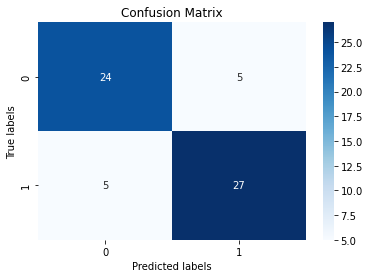

Confusion Matrix for KNN


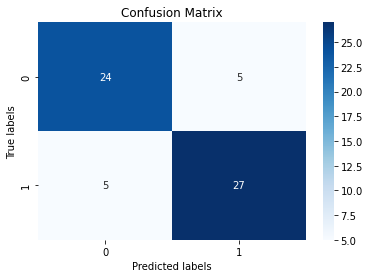

Confusion Matrix for Decision Tree Classifier


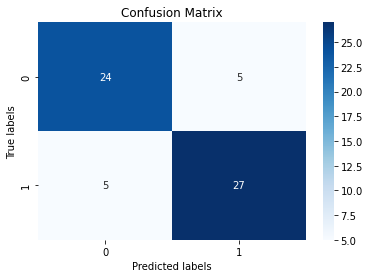

Confusion Matrix for Random Forest Classifier


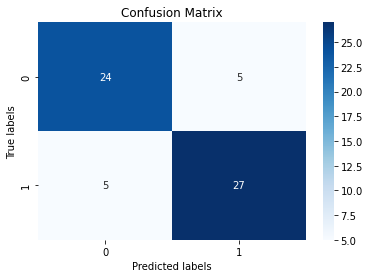

Confusion Matrix for Adaboost Classifier


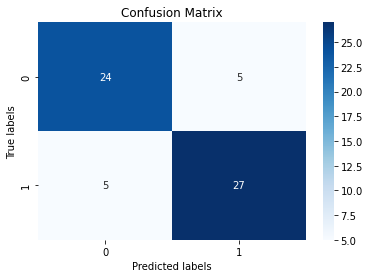

Confusion Matrix for Gaussian Naive Bayes


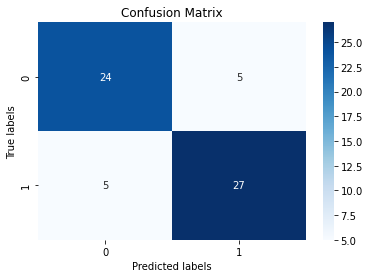

Confusion Matrix for XGBoost Classifier


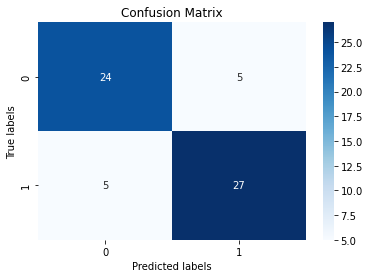

In [135]:
#CONFUSION MATRIX FOR ALL MODELS PLOTS

import seaborn as sns
import matplotlib.pyplot as plt

def plot_confusion_matrix(model, X_test, y_test):
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    ax= plt.subplot()
    sns.heatmap(cm, annot=True, ax = ax, cmap='Blues', fmt='g')

    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix')
    ax.xaxis.set_ticklabels(['0', '1'])
    ax.yaxis.set_ticklabels(['0', '1'])
    plt.show()

for model_name, model_params in models.items():
    print(f"Confusion Matrix for {model_name}")
    plot_confusion_matrix(clf, X_test, y_test)


## Hyperparameter tuning of some of models

### KNN

In [136]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

# define the parameter grid to search over
param_grid = {'n_neighbors': [3, 5, 7], 'weights': ['uniform', 'distance'], 'p': [1, 2]}

# create a KNN model object
knn = KNeighborsClassifier()

# create a GridSearchCV object
knn_grid = GridSearchCV(knn, param_grid, cv=5)

# fit the GridSearchCV object to the training data
knn_grid.fit(X_train, y_train)

# get the best hyperparameters
print("Best hyperparameters:", knn_grid.best_params_)

# get the tuned KNN model
knn_tuned = knn_grid.best_estimator_


Best hyperparameters: {'n_neighbors': 7, 'p': 1, 'weights': 'distance'}


In [137]:
# predict using the tuned KNN model
y_test_pred = knn_tuned.predict(X_test)

# calculate evaluation metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
accuracy = accuracy_score(y_test, y_test_pred)
precision = precision_score(y_test, y_test_pred)
recall = recall_score(y_test, y_test_pred)
f1 = f1_score(y_test, y_test_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)


Accuracy: 0.9180327868852459
Precision: 0.9655172413793104
Recall: 0.875
F1 Score: 0.9180327868852458


In [138]:
# calculate confusion matrix
cm = confusion_matrix(y_test, y_test_pred)
print("Confusion Matrix:\n", cm)

Confusion Matrix:
 [[28  1]
 [ 4 28]]


### XGBoost

In [139]:
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBClassifier

# create the XGBoost model
xgb_model = XGBClassifier()

# define the hyperparameter grid to search over
param_grid = {
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'n_estimators': [50, 100, 200],
    'subsample': [0.5, 0.75, 1.0],
    'colsample_bytree': [0.5, 0.75, 1.0],
    'gamma': [0, 0.1, 0.2, 0.3]
}

# perform RandomizedSearchCV to find the best hyperparameters
xgb_tuned = RandomizedSearchCV(estimator=xgb_model, param_distributions=param_grid, n_iter=50, cv=5, random_state=42)
xgb_tuned.fit(X_train, y_train)

# print the best hyperparameters found
print("Best parameters found:", xgb_tuned.best_params_)


Best parameters found: {'subsample': 0.5, 'n_estimators': 100, 'max_depth': 5, 'learning_rate': 0.1, 'gamma': 0.2, 'colsample_bytree': 0.5}


In [140]:
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBClassifier

# create XGBClassifier object
xgb = XGBClassifier()

# set hyperparameters to tune
params = {
    'n_estimators': [50, 100, 150, 200, 250],
    'max_depth': [3, 5, 7, 9],
    'learning_rate': [0.01, 0.1, 0.5, 1],
    'subsample': [0.5, 0.7, 1],
    'colsample_bytree': [0.5, 0.7, 1],
    'gamma': [0, 0.1, 0.5, 1],
}

# create RandomizedSearchCV object
rand_search = RandomizedSearchCV(xgb, param_distributions=params, n_iter=50, cv=5, scoring='accuracy')

# fit the randomized search object to the data
rand_search.fit(X_train, y_train)

# print the best hyperparameters found by the randomized search
print('Best hyperparameters:', rand_search.best_params_)

# predict using the tuned XGBoost model
y_test_pred = rand_search.predict(X_test)

# calculate evaluation metrics
accuracy = accuracy_score(y_test, y_test_pred)
precision = precision_score(y_test, y_test_pred)
recall = recall_score(y_test, y_test_pred)
f1 = f1_score(y_test, y_test_pred)

# print the evaluation metrics
print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1 score:', f1)

# calculate and print the confusion matrix
cm = confusion_matrix(y_test, y_test_pred)
print('Confusion matrix:\n', cm)


Best hyperparameters: {'subsample': 1, 'n_estimators': 200, 'max_depth': 3, 'learning_rate': 0.1, 'gamma': 0.5, 'colsample_bytree': 0.5}
Accuracy: 0.8852459016393442
Precision: 0.9310344827586207
Recall: 0.84375
F1 score: 0.8852459016393444
Confusion matrix:
 [[27  2]
 [ 5 27]]


### Adaboost

In [141]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# create an AdaBoost Classifier object
adaboost = AdaBoostClassifier()

# define the parameter grid to search over
param_grid = {
    'n_estimators': [50, 100, 150, 200],
    'learning_rate': [0.1, 0.5, 1, 2]
}

# perform a grid search with cross-validation
grid_search = GridSearchCV(adaboost, param_grid=param_grid, cv=5)

# fit the grid search to the training data
grid_search.fit(X_train, y_train)

# predict using the tuned Adaboost model
y_test_pred = grid_search.predict(X_test)

# calculate evaluation metrics
accuracy = accuracy_score(y_test, y_test_pred)
precision = precision_score(y_test, y_test_pred)
recall = recall_score(y_test, y_test_pred)
f1 = f1_score(y_test, y_test_pred)
confusion_mat = confusion_matrix(y_test, y_test_pred)

# print the evaluation metrics
print("Accuracy: {:.4f}".format(accuracy))
print("Precision: {:.4f}".format(precision))
print("Recall: {:.4f}".format(recall))
print("F1 Score: {:.4f}".format(f1))
print("Confusion Matrix:\n", confusion_mat)


Accuracy: 0.8525
Precision: 0.8710
Recall: 0.8438
F1 Score: 0.8571
Confusion Matrix:
 [[25  4]
 [ 5 27]]


# Comparing models

Training Logistic Regression...
Training KNN...
Training Decision Tree Classifier...
Training Random Forest Classifier...
Training Adaboost Classifier...
Training Gaussian Naive Bayes...
Training XGBoost Classifier...


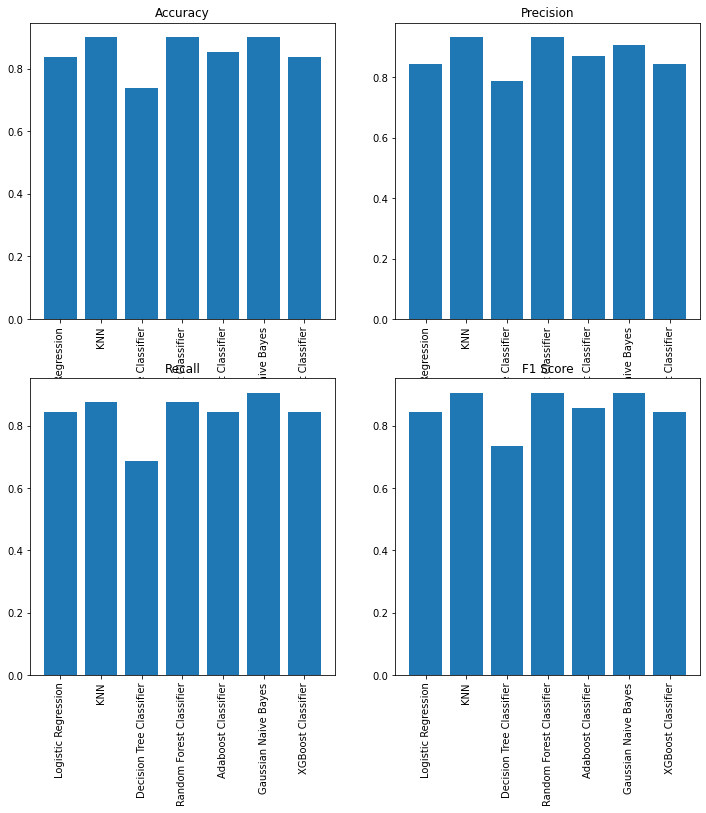

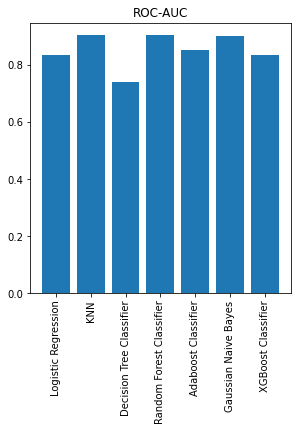

In [143]:
model_metrics = []
for model_name, model_params in models.items():
    print(f"Training {model_name}...")
    clf = GridSearchCV(model_params['model'], model_params['param_grid'], cv=5, n_jobs=-1)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred)
    
    model_metrics.append({
        'Model': model_name,
        'Accuracy': acc,
        'Precision': prec,
        'Recall': rec,
        'F1 Score': f1,
        'ROC-AUC': roc_auc
    })


# Create a dataframe to store the metrics of each model
metrics_df = pd.DataFrame(model_metrics)

# Compare the metrics across the models
plt.figure(figsize=(12, 12))
plt.subplot(2, 2, 1)
plt.bar(metrics_df['Model'], metrics_df['Accuracy'])
plt.title('Accuracy')
plt.xticks(rotation=90)

plt.subplot(2, 2, 2)
plt.bar(metrics_df['Model'], metrics_df['Precision'])
plt.title('Precision')
plt.xticks(rotation=90)

plt.subplot(2, 2, 3)
plt.bar(metrics_df['Model'], metrics_df['Recall'])
plt.title('Recall')
plt.xticks(rotation=90)

plt.subplot(2, 2, 4)
plt.bar(metrics_df['Model'], metrics_df['F1 Score'])
plt.title('F1 Score')
plt.xticks(rotation=90)

plt.figure(figsize=(8, 10))
plt.subplot(2, 2, 1)
plt.bar(metrics_df['Model'], metrics_df['ROC-AUC'])
plt.title('ROC-AUC')
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

In this project, I used Machine Learning to predict whether a person is suffering from a heart disease. After importing the data, I did EDA,data pre-processing & Feature Engineering. Then, I did generated dummy variables for categorical features and scaled other features. Then ,I  applied  Machine Learning algorithms like logistic Regression,K Neighbors Classifier, Decision Tree Classifier,Random Forest Classifier,Adaboost,Naive Bayes & XGBoost. I did hyperparameter tuning across each model to improve their scores.

**Finally , K Neighbors Classifier gave best all performance metrics & secondly, Naive bayes gave second best results.**